Text(0.5, 1.0, 'Bitwise XOR')

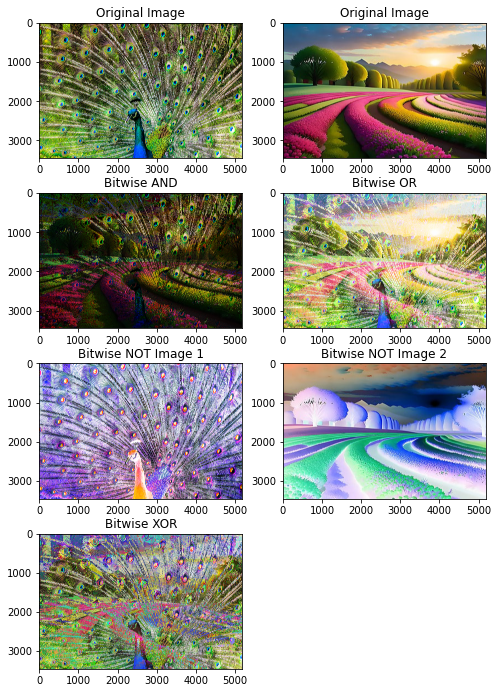

In [2]:
#bitwise_operations
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('im3.jpg')
img2 = cv2.imread('im4.jpg')

# Resize images to the same dimensions if needed
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Perform bitwise AND operation
bitwise_and = cv2.bitwise_and(img1, img2)

# Perform bitwise OR operation
bitwise_or = cv2.bitwise_or(img1, img2)

# Perform bitwise XOR operation
bitwise_xor = cv2.bitwise_xor(img1, img2)

# Perform bitwise NOT operation
bitwise_not_img1 = cv2.bitwise_not(img1)
bitwise_not_img2 = cv2.bitwise_not(img2)

# Display results
plt.figure(figsize = (8,12))
plt.subplot(4,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(4,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(4,2,3)
plt.imshow(cv2.cvtColor(bitwise_and, cv2.COLOR_BGR2RGB))
plt.title('Bitwise AND')

plt.subplot(4,2,4)
plt.imshow(cv2.cvtColor(bitwise_or, cv2.COLOR_BGR2RGB))
plt.title('Bitwise OR')

plt.subplot(4,2,5)
plt.imshow(cv2.cvtColor(bitwise_not_img1, cv2.COLOR_BGR2RGB))
plt.title('Bitwise NOT Image 1')

plt.subplot(4,2,6)
plt.imshow(cv2.cvtColor(bitwise_not_img2, cv2.COLOR_BGR2RGB))
plt.title('Bitwise NOT Image 2')

plt.subplot(4,2,7)
plt.imshow(cv2.cvtColor(bitwise_xor, cv2.COLOR_BGR2RGB))
plt.title('Bitwise XOR')


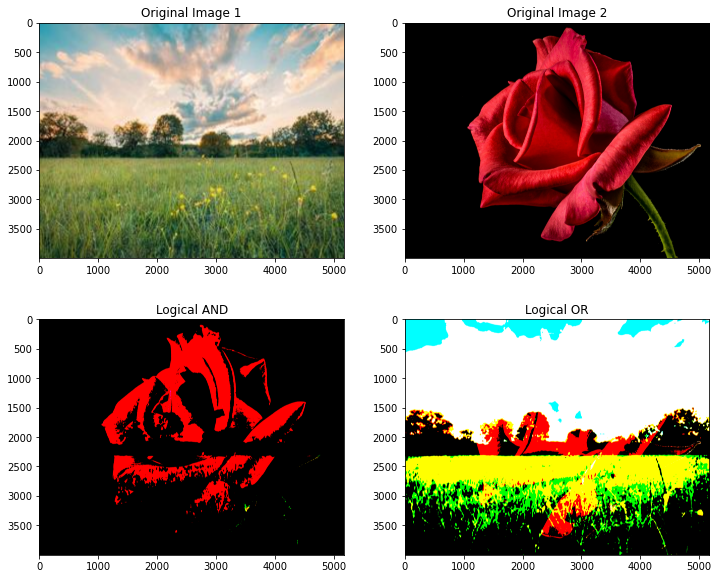

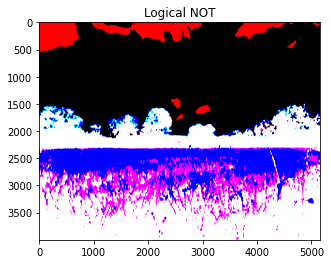

In [5]:
#logical_operation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to threshold image to binary per channel
def threshold_image(image, threshold=128):
    # Split the image into its color channels
    channels = cv2.split(image)
    binary_channels = []
    for channel in channels:
        _, binary_channel = cv2.threshold(channel, threshold, 255, cv2.THRESH_BINARY)
        binary_channels.append(binary_channel)
    return cv2.merge(binary_channels)

# Load images
image1 = cv2.imread('im5.jpg')
image2 = cv2.imread('im6.jpg')

# Ensure the images are of the same size
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Threshold images to create binary images
binary_image1 = threshold_image(image1)
binary_image2 = threshold_image(image2)

# Perform logical AND operation
logical_and = np.logical_and(binary_image1, binary_image2).astype(np.uint8) * 255

# Perform logical OR operation
logical_or = np.logical_or(binary_image1, binary_image2).astype(np.uint8) * 255

# Perform logical NOT operation on the first image
logical_not = np.logical_not(binary_image1).astype(np.uint8) * 255

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(logical_and, cv2.COLOR_BGR2RGB))
plt.title('Logical AND')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(logical_or, cv2.COLOR_BGR2RGB))
plt.title('Logical OR')

plt.figure()
plt.imshow(cv2.cvtColor(logical_not, cv2.COLOR_BGR2RGB))
plt.title('Logical NOT')
plt.show()

In [ ]:
#without using builtin function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to add two images manually
def add_images(image1, image2):
    # Ensure the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for addition.")
   
    # Convert images to int32 to handle overflow
    image1_int = image1.astype(np.int32)
    image2_int = image2.astype(np.int32)
   
    # Create an empty array for the output image
    result_image = np.zeros_like(image1_int)
   
    rows, cols, channels = image1_int.shape
   
    # Manually add pixel values
    for row in range(rows):
        for col in range(cols):
            for channel in range(channels):
                pixel_sum = image1_int[row, col, channel] + image2_int[row, col, channel]
                result_image[row, col, channel] = np.clip(pixel_sum, 0, 255)
   
    # Convert back to uint8
    result_image = result_image.astype(np.uint8)
   
    return result_image

# Load images
image1 = cv2.imread('im1.jpg')
image2 = cv2.imread('im2.jpg')

# Ensure the images are of the same size
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Add images manually
added_image = add_images(image1, image2)

# Display the result
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(added_image, cv2.COLOR_BGR2RGB))
plt.title('Added Image')